In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Read data

In [2]:
data = pd.read_csv('/content/train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

check for null values

In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


check the correlation in columns

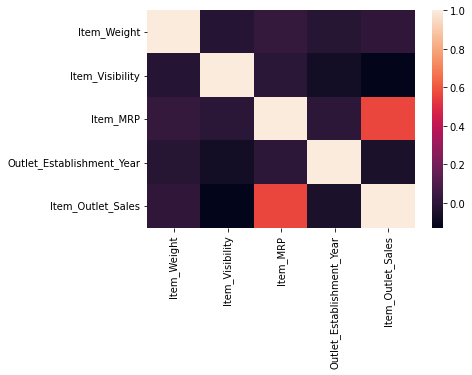

In [8]:
sns.heatmap(data.corr())

Box plot of undesrstanding distribution and check for outliers

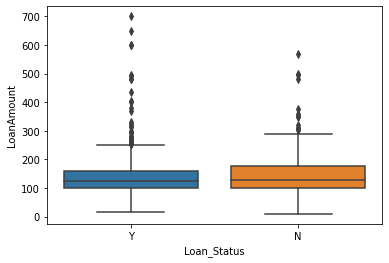

In [ ]:
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Replace the null values with median for numeric columns

In [11]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].median())

In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replace the null values with most occuring data for non numeric columns

In [13]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data.groupby('Outlet_Size')['Item_Identifier'].count().idxmax())


In [14]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Encode all non numeric columns

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for column in columns:
  data[column] = encoder.fit_transform(data[column])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
model = RandomForestRegressor()

In [20]:
model.fit(x,y)

RandomForestRegressor()

Readint the test data

In [22]:
test_data = pd.read_csv('/content/test_AbJTz2l.csv')

In [61]:
test_data1 = pd.read_csv('/content/test_AbJTz2l.csv')
test_data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [31]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Transforming the test data 

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for column in columns:
  test_data[column] = encoder.fit_transform(test_data[column])

In [30]:
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data.groupby('Outlet_Size')['Item_Identifier'].count().idxmax())
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].median())


In [39]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.500,2,0.118599,4,234.2300,5,1985,1,2,3


In [32]:
y_pred = model.predict(test_data)

In [37]:
pred_data = pd.DataFrame(y_pred)
pred_data.to_csv('test.csv')

In [65]:
pred_data.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1785.109670
1,FDW14,OUT017,1401.402472
2,NCN55,OUT010,693.736968
3,FDQ58,OUT017,2385.834378
4,FDY38,OUT027,6109.167744


Giving the proper column name for the predcted values

In [62]:
pred_data['Item_Identifier'] = test_data1['Item_Identifier']


In [63]:
pred_data['Outlet_Identifier'] = test_data1['Outlet_Identifier']

In [44]:
pred_data =  pred_data.rename(columns={0: 'Item_Outlet_Sales'})

In [64]:
pred_data = pred_data[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

find the current parameters

In [48]:
print('current parameters', model.get_params())

current parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [49]:
from sklearn.model_selection import RandomizedSearchCV

creating random values for hyper parameters and creating grid

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

print the best parameters

In [68]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

evaluating the best model

In [72]:
best_model = rf_random.best_estimator_
pred_tune = best_model.predict(test_data)

The best model is the model with default hyper parameter 

In [73]:
pred_data_tuned = pred_data[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [74]:
pred_data_tuned['Item_Outlet_Sales'] = pred_tune

In [75]:
pred_data_tuned.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.749769
1,FDW14,OUT017,1394.587516
2,NCN55,OUT010,817.322394
3,FDQ58,OUT017,2458.007444
4,FDY38,OUT027,5405.383431


In [82]:
pred_data_tuned.reset_index(drop=True, inplace=True)
pred_data.reset_index(drop=True, inplace=True)

# **predicted value in the test data for the normal model**

In [83]:
pred_data.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1785.109670
1,FDW14,OUT017,1401.402472
2,NCN55,OUT010,693.736968
3,FDQ58,OUT017,2385.834378
4,FDY38,OUT027,6109.167744


# **predicted value in the test data for the tuned model.**
the tuning was perfomed using RandomSearchCV 

In [79]:
pred_data_tuned.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.749769
1,FDW14,OUT017,1394.587516
2,NCN55,OUT010,817.322394
3,FDQ58,OUT017,2458.007444
4,FDY38,OUT027,5405.383431


lets see the score of each submission in Analytics Vidhya:

saving the both file into csv 

In [80]:
pred_data.to_csv('test_normal.csv')

In [81]:
pred_data_tuned.to_csv('test_tuned.csv')

The score for Normal model is 1184.2392

The score for tuned model is 1163.8211